#Exploratory Data Analysis (EDA) on Titanic Dataset

## Objective:
To analyze the Titanic passenger dataset, clean missing data, perform statistical analysis, and visualize patterns related to passenger survival.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## Dataset Description

| Column Name | Description |
|------------|------------|
| PassengerId | Unique ID assigned to each passenger |
| Survived | Survival status (0 = No, 1 = Yes) |
| Pclass | Passenger class (1 = First, 2 = Second, 3 = Third) |
| Name | Name of the passenger |
| Sex | Gender of the passenger |
| Age | Age of the passenger |
| SibSp | Number of siblings/spouses aboard |
| Parch | Number of parents/children aboard |
| Ticket | Ticket number |
| Fare | Ticket fare |
| Cabin | Cabin number |
| Embarked | Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton) |

In [7]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## Feature Types

### Numerical Features:
- Age
- Fare
- SibSp
- Parch

### Categorical Features:
- Survived
- Pclass
- Sex
- Ticket
- Cabin
- Embarked

In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Missing Value Handling Strategy

- Age: Missing values will be filled using the median (robust to outliers).
- Cabin: Dropped because it contains too many missing values.
- Embarked: Filled using the mode (most frequent value).

In [12]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [13]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [21]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [22]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [23]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [24]:
df['Survived'].value_counts(normalize=True)*100

Survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64

In [25]:
df.groupby('Sex')['Survived'].mean()*100

Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64

## Key Statistical Insights

- Female passengers had a higher survival rate than males.
- Overall survival rate was low, indicating the severity of the disaster.
- Passenger class and gender played a significant role in survival.

In [26]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (8,5)

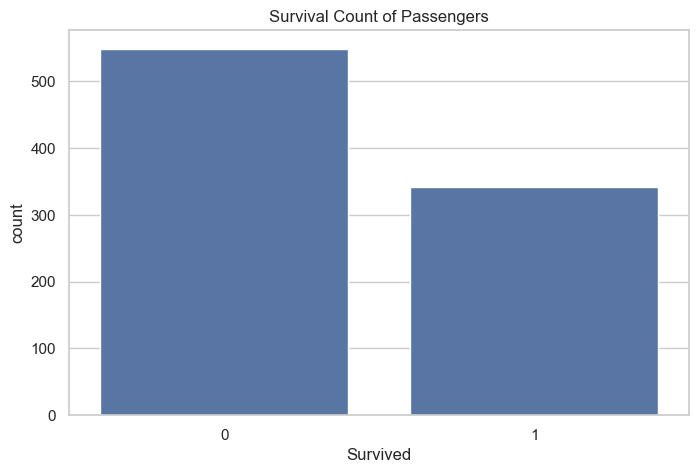

In [27]:
sns.countplot(x='Survived', data=df)
plt.title("Survival Count of Passengers")
plt.show()

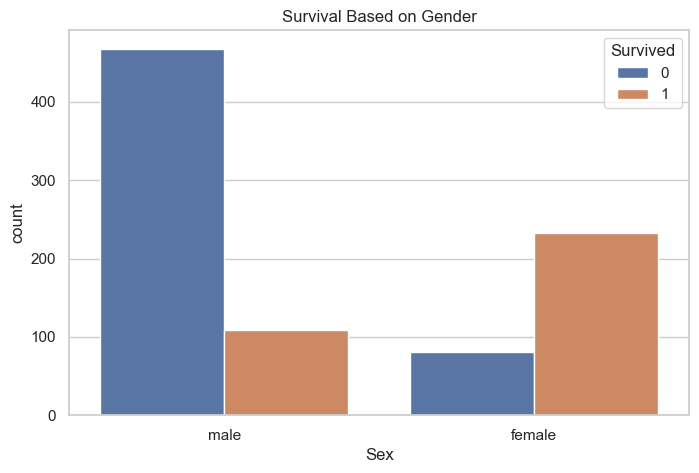

In [28]:
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title("Survival Based on Gender")
plt.show()

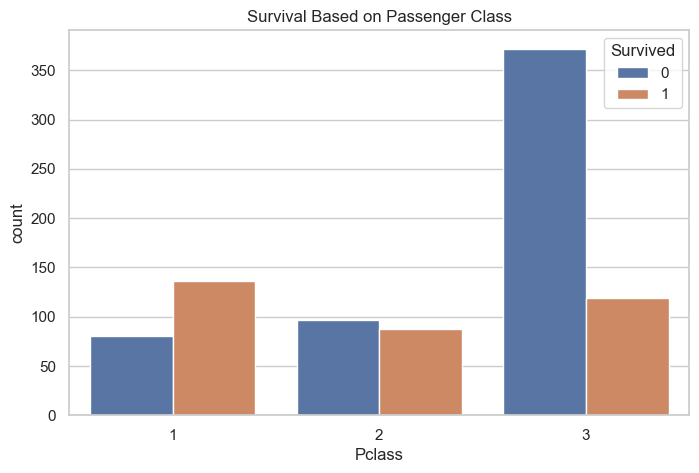

In [29]:
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title("Survival Based on Passenger Class")
plt.show()

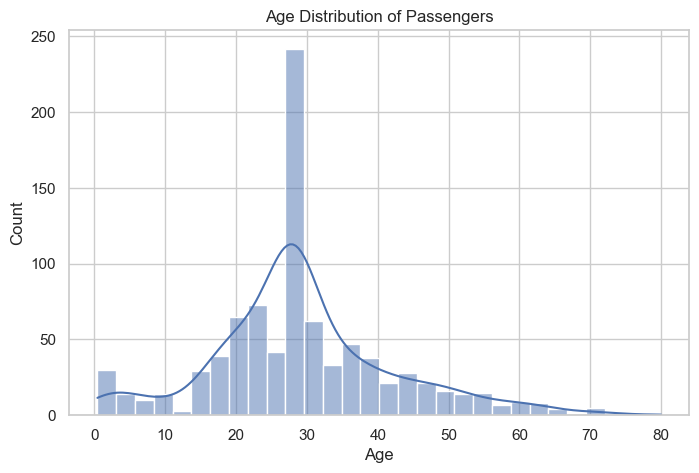

In [30]:
sns.histplot(df['Age'], bins=30, kde=True)
plt.title("Age Distribution of Passengers")
plt.show()

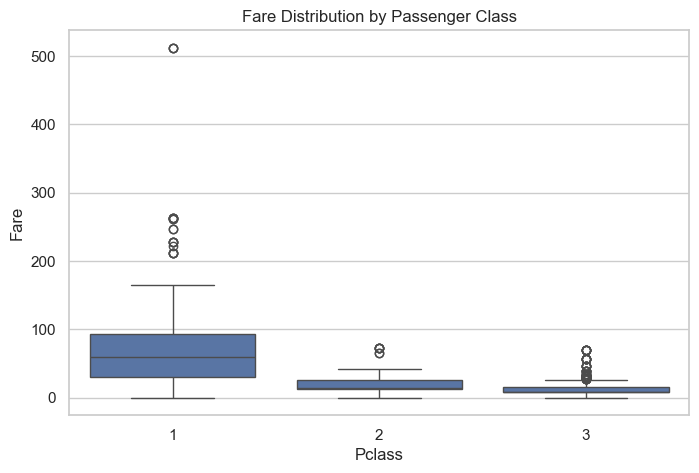

In [31]:
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title("Fare Distribution by Passenger Class")
plt.show()

## Visualization Insights

- Females had significantly higher survival rates than males.
- Passengers in first class had better survival chances.
- Most passengers were young to middle-aged adults.
- Fare distribution shows clear economic differences between classes.

# Conclusion

In this project, exploratory data analysis was performed on the Titanic dataset to 
understand factors influencing passenger survival. The dataset was cleaned by handling 
missing values and removing irrelevant features. Statistical analysis and visualizations 
revealed that gender and passenger class played a significant role in survival outcomes. 
Female passengers and those traveling in higher classes had a higher probability of survival. 
This analysis highlights how data-driven insights can be extracted using basic Python tools.

## Tools and Libraries Used

- Python
- Pandas
- NumPy
- Matplotlib
- Seaborn
- Jupyter Notebook

## Future Work

- Apply machine learning models to predict survival.
- Perform feature engineering for better predictions.
- Analyze interaction between multiple features.
- Extend the analysis using other real-world datasets.